## Data Annotaion and Analysis of Fine-tuned twitter-roberta-base-sentiment model on the Uncleaned and Cleaned data of the hatespeech

I have already done the annotation and code earlier with the **150** tweets of labelled data source and shown it to professor'bulut'; he advised me to collect the tweets directly from the x.com . i have done that for the **200** tweets and annotation process is also done.

Data collection source : https://x.com/home, here i have taken my rows from #USElection2024,#cancerfree,#positivity,#peace,#cr7,#funny,#appreciation ,#racist hashtags and used x search for few rows and ensuring the promper data sampling , i have prepared the data on my own and annotation is done based on the Annotation Guidelines(approved by professor and uploaded in GITHUB) by Me and my roommate(details mentioned below).


Here, we just count the annotated labels in the excel data as a part of analysis and proceed with the proper Text cleaning steps and save that cleaned dataset.

1. Annotator 1 is : **Me**  
2. Annotator-2 is my roommate(**SRI RAM THEERDH MANIKYALA**);who's also in the same course and doing the data annotation project currently.
3. gold labels ; they are considered on basis of best of the both annotator's label .

### Imporing the libraries

In [1]:
import pandas as pd


### Importing the Annotated data

In [19]:
df=pd.read_excel('final_tweets.xlsx')
df.head()

,Text,Annotator-1,Annotator-2,gold labels
0,You don't need a special occasion to tell some...,0,0,0
1,Thanks for your insight Colleen.Radiation is c...,0,0,0
2,End each day by journaling 3 things you’re gr...,0,0,0
3,First this shit and now jaguar pulling som bul...,1,1,1
4,And fuck you to the guy I comforted when anoth...,1,1,1


Let's count the no .of labels for the 2 annotators.

In [6]:
df['Annotator-1'].value_counts()


,count
Annotator-1,
0,102
1,98


In [7]:
df['Annotator-2'].value_counts()

,count
Annotator-2,
0,101
1,99


### Let's calculate the Inter-Annotation (cohen's kappa) score

In [8]:
from sklearn.metrics import cohen_kappa_score
annotator_1=df['Annotator-1']
annotator_2=df['Annotator-2']

In [9]:
cohen_kappa_score(annotator_1, annotator_2)#math

0.9099819963992799

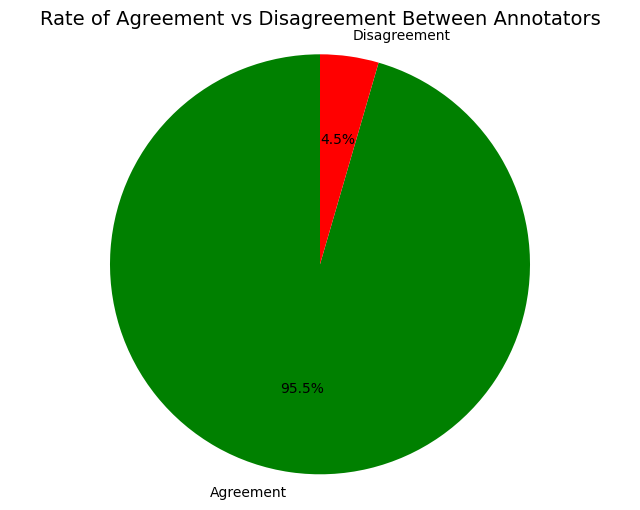

In [13]:
#Let's show the rate of agreement and disagrement between the annotators in the form of a pie chart(Referred source:https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)
import matplotlib.pyplot as plt
# we will alculate agreement and disagreement by summing their equal and non equal cases in the df
agreement = (annotator_1 == annotator_2).sum()
disagreement = (annotator_1 != annotator_2).sum()

# we will reate labels and values for the pie chart
labels = ['Agreement', 'Disagreement']
values = [agreement, disagreement]

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title("Rate of Agreement vs Disagreement Between Annotators", fontsize=14)
plt.axis('equal')  # this ensures pie is exactly circular
plt.show()

The high kappa scores suggest strong agreement between Annotator-1 and the Annotator-2 , show the consistent annotation guidelines and high reliability in the dataset labeling.let's proceed to clean the data

Let's confirm and check the value counts in gold label;as it is confirmed as my label for the model evaluation phase

In [11]:
df['gold labels'].value_counts()

,count
gold labels,
0,101
1,99


### Cleaning the data

there is no duplicate/null data as i have made the data ,so i will proceed with the Text cleaning process(Basic cleaning is enough)
I am not removing hashtags as few hashtags may contain hate/offensive things,so i am keeping them; it won't affect that much

Referred from: https://medium.com/@yashj302/text-cleaning-using-regex-python-f1dded1ac5bd

In [20]:
df['Text'] = df['Text'].str.replace(r'\bLINK\b', '', regex=True)  # removing the string 'LINK' in the text,i have found this in my data manytimes
df['Text'] = df['Text'].str.lower()  # Convert the data to lowercase
df['Text'] = df['Text'].str.replace(r'@\w+', '', regex=True)  # to remove mentions in my data.
df['Text'] = df['Text'].str.replace(r'http\S+', '', regex=True)  # Remove URL's ,there are no urls intially in my data,i guess i saw a https thing ,so i added this
df['Text'] = df['Text'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)  # to remove special charecters in my data.
df['Text'] = df['Text'].str.replace(r'\s+', ' ', regex=True).str.strip()  # to remove extra spaces

#### Let's save this cleaned dataset

In [21]:
df.to_excel('final_tweets_cleaned.xlsx',index=False)